In [37]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])
import numpy as np

In [38]:
# Load in Master Funding Data
file_path = "../../datasets/master_funding.csv"

funding_master = pd.read_csv(file_path, encoding = 'utf-8')
funding_master = funding_master.rename(columns = {'Unnamed: 0': 'STNAME'}).set_index(['STNAME'])
funding_master

,STABR,2006_R1A,2006_R1B,2006_R1C,2006_R1D,2006_R1E,2006_R1F,2006_R1G,2006_R1H,2006_R1I,...,2010_A14B,2010_PPE15,2010_MEMBR09,2010_ARRASTE1,2010_ARRATE5,2010_ARRAE81Z,2010_ARRATE10,2010_ARRASTE6,2010_ARRATLEIZ,2010_ARRASTE4
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,AL,-2,-2,837722644,507421446,3563199,902980,0,86597,80153773,...,698208,8651,748889,369660033,381295043,138409,6187052,2689876,99711346,0
alaska,AK,-2,-2,169308873,180834960,0,0,0,0,11988478,...,-2,16668,131661,23470386,49963570,0,3835787,1228974,13751946,0
arizona,AZ,2610582721,-2,-2,40960642,580878,21656088,129949,403161,59366011,...,-2,8255,1077831,539065103,550231077,548353,29137598,232566,253804938,-2
arkansas,AR,1094994437,1245972,1520969,792048,4678927,2982173,60826,135367,45949378,...,-2,9481,480559,76412045,134544527,427520,61383167,76377545,37711346,-2
california,CA,13875619650,450091925,168400,-2,199551,216962720,23243683,36124922,1056239256,...,-2,9229,6263438,2332892784,3209610616,69829727,20955494,8622373,452377212,-1
colorado,CO,2828139818,71445787,-2,-2,47598986,5266907,5184240,111686,106929973,...,-2,9024,832368,69641156,111859035,6107904,10567842,72984,47800312,0
connecticut,CT,-2,-2,4771725433,-2,3053979,160635678,0,9311737,1146385,...,548787,15619,563968,368176090,368176090,1085172,10041669,-1,39247400,1753315
delaware,DE,355448768,-2,-2,-2,0,47385484,0,0,9687604,...,119879,12415,126801,47318827,60815739,53106,1762749,0,11821846,0
district of columbia,DC,-2,-2,228167996,815773094,557725,0,233388,0,45624,...,-2,20460,69433,94922392,100828760,796006,1268635,0,22900442,0


In [39]:
# Load in Dropout Rates
dropout_path_2006 = "../../datasets/subsets/success/success_df_2006.csv"
dropout_path_2007 = "../../datasets/subsets/success/success_df_2007.csv"
dropout_path_2008 = "../../datasets/subsets/success/success_df_2008.csv"
dropout_path_2009 = "../../datasets/subsets/success/success_df_2009.csv"
dropout_path_2010 = "../../datasets/subsets/success/success_df_2010.csv"


success_2006 = pd.read_csv(dropout_path_2006)
success_2007 = pd.read_csv(dropout_path_2007)
success_2008 = pd.read_csv(dropout_path_2008)
success_2009 = pd.read_csv(dropout_path_2009)
success_2010 = pd.read_csv(dropout_path_2010)

dropout_df = pd.DataFrame(funding_master.index)
dropout_df['2006'] = success_2006['2006_DRP912']
dropout_df['2007'] = success_2007['2007_DRP912']
dropout_df['2008'] = success_2008['2008_DRP912']
dropout_df['2009'] = success_2009['2009_DRP912']
dropout_df['2010'] = success_2010['2010_DRP912']
dropout_df['Total Change'] = dropout_df['2010'] - dropout_df['2006']
dropout_df.sort_values(by=['Total Change'], ascending = False)

,STNAME,2006,2007,2008,2009,2010,Total Change
24,mississippi,3.0,4.299999,4.599998,4.199997,7.399998,4.399998
31,new mexico,5.5,6.099998,5.199997,4.899998,6.899998,1.399998
15,iowa,2.2,2.299999,2.900000,3.099998,3.400000,1.200000
6,connecticut,2.0,2.099998,2.799999,3.099998,3.000000,1.000000
4,california,3.7,5.500000,5.000000,5.000000,4.599998,0.899998
22,michigan,3.5,7.399998,6.199997,3.799999,4.299999,0.799999
26,montana,3.7,3.699999,5.199997,5.000000,4.299999,0.599999
39,rhode island,4.1,5.799999,5.299999,4.399998,4.599998,0.499998
3,arkansas,3.1,4.599998,4.699997,4.099998,3.599998,0.499998
11,hawaii,4.7,5.399998,5.399998,4.899998,5.199997,0.499997


In [40]:
# Read in desired variables from Meta Data, always use 2006 meta to avoid using new variables not included in the beginning yrs
meta_path = "../../resources/funding_data/2006_meta.txt"
meta = pd.read_csv(meta_path, sep=r'\s{2,}', engine='python', header=None, names=['Variable','Data Type', 'Data Element Position', 'Description'])
meta = meta.drop(meta.index[0:2])
meta

,Variable,Data Type,Data Element Position,Description
2,FIPS,AN,2,FEDERAL INFORMATION PROCESSING STANDARDS (FIPS)
3,STABR,AN,3,POSTAL STATE ABBREVIATION CODES
4,STNAME,AN,4,NAME OF THE STATE OR TERRITORY
5,R1A,N,5,LOCAL REVENUES PROPERTY TAX
6,R1B,N,6,LOCAL REVENUES NONPROPERTY TAX
...,...,...,...,...
148,ADA,N,148,ADA (STATE AND NCES DEFINITION)
149,A14A,N,149,ADA (STATE DEFINITION)
150,A14B,N,150,ADA (NCES DEFINITION)
151,PPE15,N,151,PER PUPIL EXPENDITURES


In [41]:
meta['Variable'][152] = 'MEMBR'
meta

,Variable,Data Type,Data Element Position,Description
2,FIPS,AN,2,FEDERAL INFORMATION PROCESSING STANDARDS (FIPS)
3,STABR,AN,3,POSTAL STATE ABBREVIATION CODES
4,STNAME,AN,4,NAME OF THE STATE OR TERRITORY
5,R1A,N,5,LOCAL REVENUES PROPERTY TAX
6,R1B,N,6,LOCAL REVENUES NONPROPERTY TAX
...,...,...,...,...
148,ADA,N,148,ADA (STATE AND NCES DEFINITION)
149,A14A,N,149,ADA (STATE DEFINITION)
150,A14B,N,150,ADA (NCES DEFINITION)
151,PPE15,N,151,PER PUPIL EXPENDITURES


In [42]:
# Read in Cleaned subsets
revenue_in_2006 = '../../datasets/subsets/revenue/rev_2006.csv'
revenue_in_2007 = '../../datasets/subsets/revenue/rev_2007.csv'
revenue_in_2008 = '../../datasets/subsets/revenue/rev_2008.csv'
revenue_in_2009 = '../../datasets/subsets/revenue/rev_2009.csv'
revenue_in_2010 = '../../datasets/subsets/revenue/rev_2010.csv'

revenue_df_2006 = pd.read_csv(revenue_in_2006).set_index(['STNAME'])
revenue_df_2007 = pd.read_csv(revenue_in_2007).set_index(['STNAME'])
revenue_df_2008 = pd.read_csv(revenue_in_2008).set_index(['STNAME'])
revenue_df_2009 = pd.read_csv(revenue_in_2009).set_index(['STNAME'])
revenue_df_2010 = pd.read_csv(revenue_in_2010).set_index(['STNAME'])

supp_ex_in_2006 = '../../datasets/subsets/supp_ex/supp_ex_2006.csv'
supp_ex_in_2007 = '../../datasets/subsets/supp_ex/supp_ex_2007.csv'
supp_ex_in_2008 = '../../datasets/subsets/supp_ex/supp_ex_2008.csv'
supp_ex_in_2009 = '../../datasets/subsets/supp_ex/supp_ex_2009.csv'
supp_ex_in_2010 = '../../datasets/subsets/supp_ex/supp_ex_2010.csv'

supp_ex_df_2006 = pd.read_csv(supp_ex_in_2006).set_index(['STNAME'])
supp_ex_df_2007 = pd.read_csv(supp_ex_in_2007).set_index(['STNAME'])
supp_ex_df_2008 = pd.read_csv(supp_ex_in_2008).set_index(['STNAME'])
supp_ex_df_2009 = pd.read_csv(supp_ex_in_2009).set_index(['STNAME'])
supp_ex_df_2010 = pd.read_csv(supp_ex_in_2010).set_index(['STNAME'])

inst_ex_in_2006 = '../../datasets/subsets/inst_ex/inst_ex_2006.csv'
inst_ex_in_2007 = '../../datasets/subsets/inst_ex/inst_ex_2007.csv'
inst_ex_in_2008 = '../../datasets/subsets/inst_ex/inst_ex_2008.csv'
inst_ex_in_2009 = '../../datasets/subsets/inst_ex/inst_ex_2009.csv'
inst_ex_in_2010 = '../../datasets/subsets/inst_ex/inst_ex_2010.csv'

inst_ex_df_2006 = pd.read_csv(inst_ex_in_2006).set_index(['STNAME'])
inst_ex_df_2007 = pd.read_csv(inst_ex_in_2007).set_index(['STNAME'])
inst_ex_df_2008 = pd.read_csv(inst_ex_in_2008).set_index(['STNAME'])
inst_ex_df_2009 = pd.read_csv(inst_ex_in_2009).set_index(['STNAME'])
inst_ex_df_2010 = pd.read_csv(inst_ex_in_2010).set_index(['STNAME'])

other_met_in_2006 = '../../datasets/subsets/other_metrics/other_met_2006.csv'
other_met_in_2007 = '../../datasets/subsets/other_metrics/other_met_2007.csv'
other_met_in_2008 = '../../datasets/subsets/other_metrics/other_met_2008.csv'
other_met_in_2009 = '../../datasets/subsets/other_metrics/other_met_2009.csv'
other_met_in_2010 = '../../datasets/subsets/other_metrics/other_met_2010.csv'

other_met_df_2006 = pd.read_csv(other_met_in_2006).set_index(['STNAME'])
other_met_df_2007 = pd.read_csv(other_met_in_2007).set_index(['STNAME'])
other_met_df_2008 = pd.read_csv(other_met_in_2008).set_index(['STNAME'])
other_met_df_2009 = pd.read_csv(other_met_in_2009).set_index(['STNAME'])
other_met_df_2010 = pd.read_csv(other_met_in_2010).set_index(['STNAME'])

other_met_df_2007

,2007_E3A11,2007_E3A12,2007_E3A13,2007_E3A14,2007_E3A2,2007_E3A16,2007_E3A1,2007_E3B11,2007_E3B12,2007_E3B13,...,2007_X12D,2007_X12E,2007_X12F,2007_TX12,2007_NCE13,2007_ADA,2007_A14A,2007_A14B,2007_PPE15,2007_MEMBR
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,137483273,89477388,8805250,175727560,9845741,247364.0,411740835,NaN,NaN,NaN,...,18915190.0,3018178.0,NaN,492466089,5752565053,714302,NaN,714302.0,8053,743632
alaska,16618449,8459064,1000434,21155696,446550,NaN,47233643,586873.0,252122.0,3211235.0,...,1339065.0,1914033.0,54091.0,63888138,1570428060,120988,120988.0,NaN,12980,132608
arizona,103137811,30487218,58811910,144060255,19083795,8936766.0,345433960,NaN,NaN,NaN,...,NaN,3648934.0,NaN,518890857,7296829426,972404,972404.0,NaN,7504,1068249
arkansas,77430661,22432551,4999642,103117273,2219805,178648.0,208158775,2750.0,210.0,1255695.0,...,NaN,1055746.0,NaN,263055584,3734645032,436804,436804.0,NaN,8550,476409
california,712905952,266627043,64453044,1011684686,14980541,226778.0,2055897503,62310271.0,26148485.0,21881283.0,...,285680759.0,2096523.0,16338720.0,2743176425,54609422591,6351774,6351774.0,NaN,8598,6406750
colorado,72386848,19676641,12322113,106410969,6180115,1118233.0,211914804,19321046.0,4647447.0,2925021.0,...,1195572.0,1830064.0,140497.0,468089840,6110963138,722168,722168.0,NaN,8462,794026
connecticut,64473389,29513495,16771355,85567999,3251999,1775984.0,198102222,41948342.0,9448238.0,10127588.0,...,27285762.0,502201.0,763351.0,228406941,7627051584,555428,NaN,555428.0,13732,575100
delaware,22853466,6295039,3112896,29427606,1473945,809764.0,62498771,NaN,NaN,NaN,...,13572434.0,706090.0,770387.0,53969444,1383737438,113992,NaN,113992.0,12139,122254
district of columbia,9044411,2189699,363135,11616346,255470,NaN,23213591,NaN,NaN,NaN,...,8268049.0,766085.0,160972.0,88175584,1041830277,61799,61799.0,NaN,16858,72850


,2006_R1A,2006_R1B,2006_R1C,2006_R1D,2006_R1E,2006_R1F,2006_R1G,2006_R1H,2006_R1I,2006_R1J,...,2006_R1L,2006_R1M,2006_R1N,2006_R2,2006_R3,2006_R4A,2006_R4B,2006_R4C,2006_R4D,2006_R5
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,NaN,NaN,8.377226e+08,5.074214e+08,3563199.0,9.029800e+05,NaN,86597.0,8.015377e+07,129652208,...,2.335454e+08,1945426.0,NaN,84058553.0,3.547078e+09,18646756.0,722134379,320732.0,17738068.0,5.809597e+08
alaska,NaN,NaN,1.693089e+08,1.808350e+08,NaN,NaN,NaN,NaN,1.198848e+07,12186450,...,3.496444e+07,NaN,NaN,NaN,1.005181e+09,45529754.0,137031654,2109687.0,106521415.0,NaN
arizona,2.610583e+09,NaN,NaN,4.096064e+07,580878.0,2.165609e+07,129949.0,403161.0,5.936601e+07,117771588,...,3.809437e+08,877800.0,6064136.0,204055366.0,4.272320e+09,18931770.0,835576202,596874.0,185144404.0,6.652259e+08
arkansas,1.094994e+09,1.245972e+06,1.520969e+06,7.920480e+05,4678927.0,2.982173e+06,60826.0,135367.0,4.594938e+07,54430437,...,7.339600e+07,46094.0,392402.0,3773441.0,2.432920e+09,29364086.0,455589818,104272.0,41798.0,2.480611e+08
california,1.387562e+10,4.500919e+08,1.684000e+05,NaN,199551.0,2.169627e+08,23243683.0,36124922.0,1.056239e+09,573634361,...,3.069683e+09,NaN,NaN,NaN,3.784708e+10,399317041.0,6256207122,21089540.0,213299345.0,9.846494e+09
colorado,2.828140e+09,7.144579e+07,NaN,NaN,47598986.0,5.266907e+06,5184240.0,111686.0,1.069300e+08,94630866,...,3.273218e+08,2950071.0,3460933.0,19398046.0,3.089571e+09,54407135.0,466552838,NaN,10010277.0,6.122610e+08
connecticut,NaN,NaN,4.771725e+09,NaN,3053979.0,1.606357e+08,NaN,9311737.0,1.146385e+06,126561878,...,3.950161e+07,NaN,551496.0,NaN,3.351644e+09,41257086.0,360438755,NaN,15933361.0,7.502264e+08
delaware,3.554488e+08,NaN,NaN,NaN,NaN,4.738548e+07,NaN,NaN,9.687604e+06,16674931,...,5.398194e+07,NaN,NaN,NaN,9.698542e+08,NaN,125194405,NaN,1745666.0,1.938143e+08
district of columbia,NaN,NaN,2.281680e+08,8.157731e+08,557725.0,NaN,233388.0,NaN,4.562400e+04,988870,...,NaN,719954.0,218977.0,NaN,NaN,384278.0,125898200,18942952.0,1472874.0,NaN


Text(0, 0.5, 'Average Revenue (Billions of $)')

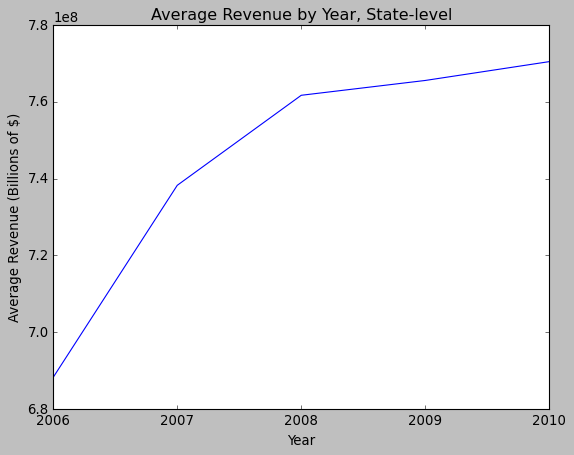

In [48]:
avg_2006 = revenue_df_2006.mean(axis = 1).mean(axis = 0)
avg_2007 = revenue_df_2007.mean(axis = 1).mean(axis = 0)
avg_2008 = revenue_df_2008.mean(axis = 1).mean(axis = 0)
avg_2009 = revenue_df_2009.mean(axis = 1).mean(axis = 0)
avg_2010 = revenue_df_2010.mean(axis = 1).mean(axis = 0)

years = ['2006', '2007', '2008', '2009', '2010']

plt.plot(years, [avg_2006, avg_2007, avg_2008, avg_2009, avg_2010])
plt.title("Average Revenue by Year, State-level")
plt.xlabel("Year")
plt.ylabel("Average Revenue (Billions of $)")

In [46]:
total_2006 = revenue_df_2006.mean(axis = 1).mean(axis = 0)
total_2006

688264631.4005889

Text(0, 0.5, 'Average PPE ($)')

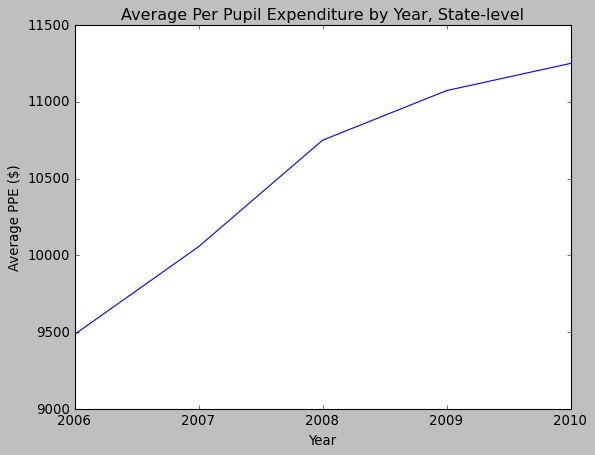

In [52]:
avg_2006 = other_met_df_2006['2006_PPE15'].mean(axis = 0)
avg_2007 = other_met_df_2007['2007_PPE15'].mean(axis = 0)
avg_2008 = other_met_df_2008['2008_PPE15'].mean(axis = 0)
avg_2009 = other_met_df_2009['2009_PPE15'].mean(axis = 0)
avg_2010 = other_met_df_2010['2010_PPE15'].mean(axis = 0)

years = ['2006', '2007', '2008', '2009', '2010']

plt.plot(years, [avg_2006, avg_2007, avg_2008, avg_2009, avg_2010])
plt.title("Average Per Pupil Expenditure by Year, State-level")
plt.xlabel("Year")
plt.ylabel("Average PPE ($)")

Text(0, 0.5, 'Average Support Expenditure (100M $)')

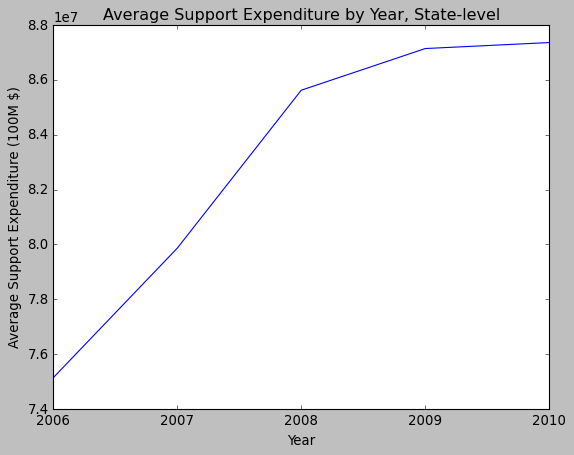

In [54]:
avg_2006 = supp_ex_df_2006.mean(axis = 1).mean(axis = 0)
avg_2007 = supp_ex_df_2007.mean(axis = 1).mean(axis = 0)
avg_2008 = supp_ex_df_2008.mean(axis = 1).mean(axis = 0)
avg_2009 = supp_ex_df_2009.mean(axis = 1).mean(axis = 0)
avg_2010 = supp_ex_df_2010.mean(axis = 1).mean(axis = 0)

years = ['2006', '2007', '2008', '2009', '2010']

plt.plot(years, [avg_2006, avg_2007, avg_2008, avg_2009, avg_2010])
plt.title("Average Support Expenditure by Year, State-level")
plt.xlabel("Year")
plt.ylabel("Average Support Expenditure (100M $)")

Text(0, 0.5, 'Average Instructional Expenditure (100M $)')

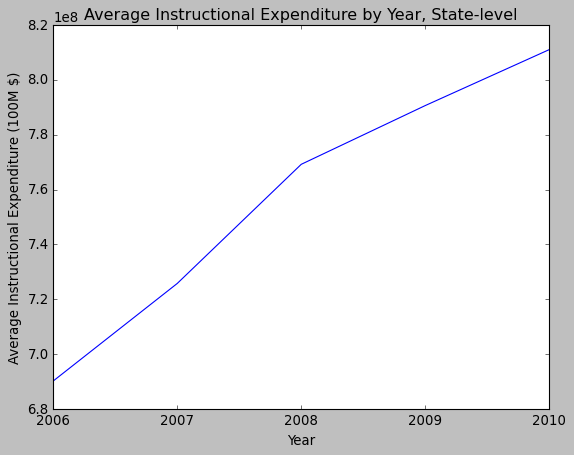

In [56]:
avg_2006 = inst_ex_df_2006.mean(axis = 1).mean(axis = 0)
avg_2007 = inst_ex_df_2007.mean(axis = 1).mean(axis = 0)
avg_2008 = inst_ex_df_2008.mean(axis = 1).mean(axis = 0)
avg_2009 = inst_ex_df_2009.mean(axis = 1).mean(axis = 0)
avg_2010 = inst_ex_df_2010.mean(axis = 1).mean(axis = 0)

years = ['2006', '2007', '2008', '2009', '2010']

plt.plot(years, [avg_2006, avg_2007, avg_2008, avg_2009, avg_2010])
plt.title("Average Instructional Expenditure by Year, State-level")
plt.xlabel("Year")
plt.ylabel("Average Instructional Expenditure (100M $)")

<function matplotlib.pyplot.show(*args, **kw)>

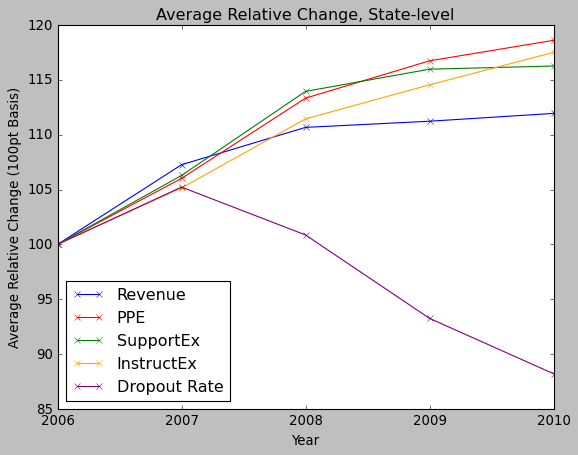

In [70]:
# Plot for relative growth accross all interested areas
rev_2006 = revenue_df_2006.mean(axis = 1).mean(axis = 0) / revenue_df_2006.mean(axis = 1).mean(axis = 0) * 100
rev_2007 = revenue_df_2007.mean(axis = 1).mean(axis = 0) / revenue_df_2006.mean(axis = 1).mean(axis = 0) * 100
rev_2008 = revenue_df_2008.mean(axis = 1).mean(axis = 0) / revenue_df_2006.mean(axis = 1).mean(axis = 0) * 100
rev_2009 = revenue_df_2009.mean(axis = 1).mean(axis = 0) / revenue_df_2006.mean(axis = 1).mean(axis = 0) * 100
rev_2010 = revenue_df_2010.mean(axis = 1).mean(axis = 0) / revenue_df_2006.mean(axis = 1).mean(axis = 0) * 100

ppe_2006 = other_met_df_2006['2006_PPE15'].mean(axis = 0) / other_met_df_2006['2006_PPE15'].mean(axis = 0) * 100
ppe_2007 = other_met_df_2007['2007_PPE15'].mean(axis = 0) / other_met_df_2006['2006_PPE15'].mean(axis = 0) * 100
ppe_2008 = other_met_df_2008['2008_PPE15'].mean(axis = 0) / other_met_df_2006['2006_PPE15'].mean(axis = 0) * 100
ppe_2009 = other_met_df_2009['2009_PPE15'].mean(axis = 0) / other_met_df_2006['2006_PPE15'].mean(axis = 0) * 100
ppe_2010 = other_met_df_2010['2010_PPE15'].mean(axis = 0) / other_met_df_2006['2006_PPE15'].mean(axis = 0) * 100

sup_2006 = supp_ex_df_2006.mean(axis = 1).mean(axis = 0) / supp_ex_df_2006.mean(axis = 1).mean(axis = 0) * 100
sup_2007 = supp_ex_df_2007.mean(axis = 1).mean(axis = 0) / supp_ex_df_2006.mean(axis = 1).mean(axis = 0) * 100
sup_2008 = supp_ex_df_2008.mean(axis = 1).mean(axis = 0) / supp_ex_df_2006.mean(axis = 1).mean(axis = 0) * 100
sup_2009 = supp_ex_df_2009.mean(axis = 1).mean(axis = 0) / supp_ex_df_2006.mean(axis = 1).mean(axis = 0) * 100
sup_2010 = supp_ex_df_2010.mean(axis = 1).mean(axis = 0) / supp_ex_df_2006.mean(axis = 1).mean(axis = 0) * 100

ins_2006 = inst_ex_df_2006.mean(axis = 1).mean(axis = 0) / inst_ex_df_2006.mean(axis = 1).mean(axis = 0) * 100
ins_2007 = inst_ex_df_2007.mean(axis = 1).mean(axis = 0) / inst_ex_df_2006.mean(axis = 1).mean(axis = 0) * 100
ins_2008 = inst_ex_df_2008.mean(axis = 1).mean(axis = 0) / inst_ex_df_2006.mean(axis = 1).mean(axis = 0) * 100
ins_2009 = inst_ex_df_2009.mean(axis = 1).mean(axis = 0) / inst_ex_df_2006.mean(axis = 1).mean(axis = 0) * 100
ins_2010 = inst_ex_df_2010.mean(axis = 1).mean(axis = 0) / inst_ex_df_2006.mean(axis = 1).mean(axis = 0) * 100

drp_2006 = dropout_df['2006'].mean(axis = 0) / dropout_df['2006'].mean(axis = 0) * 100
drp_2007 = dropout_df['2007'].mean(axis = 0) / dropout_df['2006'].mean(axis = 0) * 100
drp_2008 = dropout_df['2008'].mean(axis = 0) / dropout_df['2006'].mean(axis = 0) * 100
drp_2009 = dropout_df['2009'].mean(axis = 0) / dropout_df['2006'].mean(axis = 0) * 100
drp_2010 = dropout_df['2010'].mean(axis = 0) / dropout_df['2006'].mean(axis = 0) * 100

years = ['2006', '2007', '2008', '2009', '2010']

plt.plot(years, [rev_2006, rev_2007, rev_2008, rev_2009, rev_2010], color = 'blue', marker = 'x', label = 'Revenue')
plt.plot(years, [ppe_2006, ppe_2007, ppe_2008, ppe_2009, ppe_2010], color = 'red', marker = 'x', label = 'PPE')
plt.plot(years, [sup_2006, sup_2007, sup_2008, sup_2009, sup_2010], color = 'green', marker = 'x', label = 'SupportEx')
plt.plot(years, [ins_2006, ins_2007, ins_2008, ins_2009, ins_2010], color = 'orange', marker = 'x', label = 'InstructEx')
plt.plot(years, [drp_2006, drp_2007, drp_2008, drp_2009, drp_2010], color = 'purple', marker = 'x', label = 'Dropout Rate')

plt.title("Average Relative Change, State-level")
plt.xlabel("Year")
plt.ylabel("Average Relative Change (100pt Basis)")
plt.legend(loc = 'lower left')
plt.show

In [64]:
dropout_df['2006'].mean(axis = 0)

4.078723404255319